# **Prim's, Kruskal's, and Dijkstra's algorithms**


### **Important Notes:**
*   **Deadline:** 11:59AM, May 3 2023 (no late applied)
*   Any questions should be sent to [sangt@uark.edu](https://)
*   Please **start early** and read the instructions as well as examples. 
*   **We recommend running this file in Google Colab**







In this homework assignment, we will explore three popular graph algorithms: Prim's, Kruskal's, and Dijkstra's algorithms. These algorithms are widely used to solve various graph-related problems, such as finding the minimum spanning tree, shortest paths, and more. By implementing these algorithms from scratch, you will gain a deeper understanding of their underlying principles and applications.

Please implement the functions in the provided spaces and run the test cases to verify your implementation.

***Please note that these hints are provided as guidance, and you are not required to strictly follow them as long as your solution does not rely on external libraries and produces the correct results. Good luck!***

****

# **Test cases and helper functions**

In [3]:
test_case1 = {
    "A": [("B", 7), ("D", 5)],
    "B": [("A", 7), ("C", 8), ("D", 9), ("E", 7)],
    "C": [("B", 8), ("E", 5)],
    "D": [("A", 5), ("B", 9), ("E", 15), ("F", 6)],
    "E": [("B", 7), ("C", 5), ("D", 15), ("F", 8), ("G", 9)],
    "F": [("D", 6), ("E", 8), ("G", 11)],
    "G": [("E", 9), ("F", 11)],
}

test_case2 = {
    "A": [("B", 3), ("D", 1)],
    "B": [("A", 3), ("C", 5), ("D", 2)],
    "C": [("B", 5), ("D", 3), ("E", 1)],
    "D": [("A", 1), ("B", 2), ("C", 3), ("E", 2)],
    "E": [("C", 1), ("D", 2)],
}

test_case3 = {
    "A": [("B", 1)],
    "B": [("A", 1), ("C", 1)],
    "C": [("B", 1), ("D", 1)],
    "D": [("C", 1), ("E", 1)],
    "E": [("D", 1)],
}

# Visualization code
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(graph):
    G = nx.Graph()

    for node in graph:
        G.add_node(node)
        for neighbor, weight in graph[node]:
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=1500, node_color='skyblue')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

# Execution time measurement
import time

def measure_execution_time(func, graph, start):
    start_time = time.time()
    result = func(graph, start)
    end_time = time.time()

    return result, end_time - start_time

def measure_execution_time_kruskal(func, graph):
    start_time = time.time()
    result = func(graph)
    end_time = time.time()

    return result, end_time - start_time



# **Problem 1:  Prim's Algorithm (20 points)**

**Task**: In this problem, you will implement Prim's algorithm, which is a greedy algorithm used to find the minimum spanning tree of a connected and undirected graph. The minimum spanning tree is a tree that connects all the vertices in the graph with the minimum possible total edge weight. Prim's algorithm is widely used in network design, as it can help minimize the cost of connecting all nodes in a network. (You can utilize the heapq library for heap implementation in these algorithms)

*Hint: Start by initializing a set to keep track of visited nodes and a min-heap to store the edges. Use the heapq library to maintain the min-heap. At each step, choose the edge with the smallest weight from the min-heap that connects a visited node to an unvisited node, and add the edge to the minimum spanning tree.*


In [13]:
import heapq

def prim(graph, start):
    """
    Input:
        graph: A dictionary representing the adjacency list of the connected, undirected, and weighted graph.
               The keys are node labels and the values are lists of tuples containing a neighbor and the edge weight.
        start: The starting node label (a key in the graph dictionary).

    Output:
        Returns the total weight of the minimum spanning tree (MST) of the input graph.
    """

    # your code here
    total_distance = 0

    visited = {start}
    temp_adds = []
    priority_queue = []
    for neighbor, weight in graph[start]:
        priority_queue.append((weight, (start, neighbor)))

    heapq.heapify(priority_queue)

    while len(priority_queue) > 0:
        # Step 3-1: Remove the vertex in the fringe with the minimum priority. O(log |V|)
        current_distance, current_vertex = heapq.heappop(priority_queue)
        visiting_vertex = current_vertex[1]
        if visiting_vertex not in visited:
            for neighbor, weight in graph[visiting_vertex]:
                if neighbor not in visited:
                    heapq.heappush(priority_queue, (weight, (visiting_vertex, neighbor)))

            visited.add(visiting_vertex)
            temp_adds.append(current_vertex)
        heapq.heapify(priority_queue)

    for element in temp_adds:
        for index in graph[element[0]]:
            if index[0] == element[1]:
                total_distance += index[1]

    return total_distance


Problem 1 - Prim's Algorithm


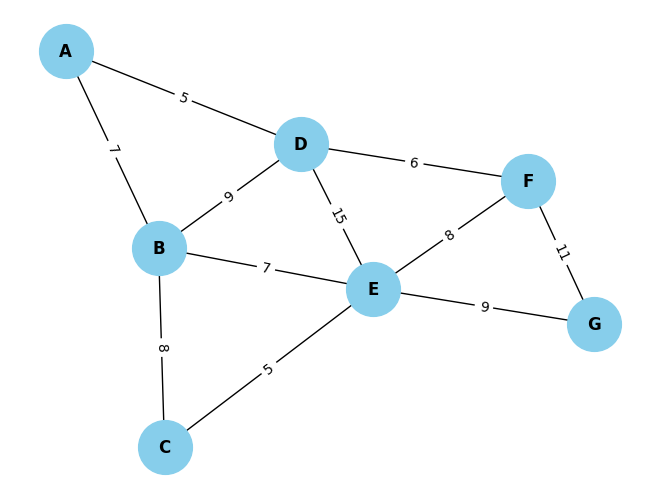

Minimum spanning tree total weight: 39
Execution time: 2.2172927856445312e-05 seconds

Test Case 2


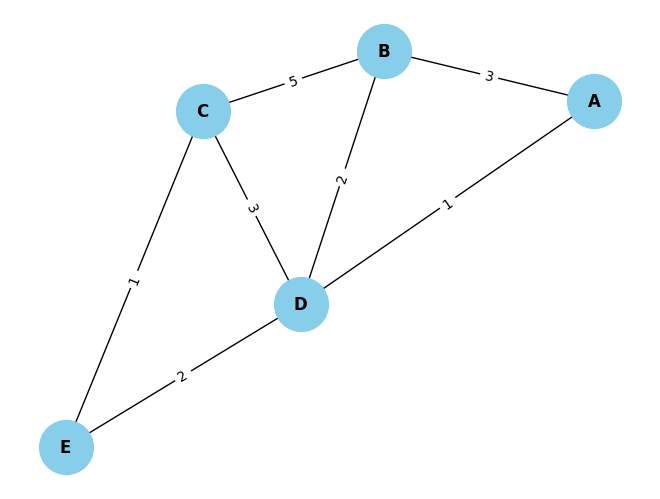

Minimum spanning tree total weight: 6
Execution time: 1.621246337890625e-05 seconds


In [14]:
# Test and visualize the results of Problem 1 - Prim's Algorithm
print("Problem 1 - Prim's Algorithm")
visualize_graph(test_case1)
result, execution_time = measure_execution_time(prim, test_case1, 'A')
print(f"Minimum spanning tree total weight: {result}")
print(f"Execution time: {execution_time} seconds")

print("\nTest Case 2")
visualize_graph(test_case2)
result, execution_time = measure_execution_time(prim, test_case2, 'A')
print(f"Minimum spanning tree total weight: {result}")
print(f"Execution time: {execution_time} seconds")

# **Problem 2: Kruskal's Algorithm (20 points)**

**Task**:  In this problem, you will implement Kruskal's algorithm, another greedy algorithm used to find the minimum spanning tree of a connected and undirected graph. Kruskal's algorithm is different from Prim's algorithm in that it sorts all the edges by weight and adds them to the minimum spanning tree in increasing order of their weight, as long as they do not create a cycle.

*Hint: Use the Union-Find data structure to efficiently check for cycles and merge connected components. You will need to implement the find and union functions for this data structure. Sort all the edges in the graph by weight, and iterate through them, adding each edge to the minimum spanning tree if it doesn't form a cycle.*


In [ ]:
def kruskal(graph):
    """
    Input:
        graph: A dictionary representing the adjacency list of the connected, undirected, and weighted graph.
               The keys are node labels and the values are lists of tuples containing a neighbor and the edge weight.

    Output:
        Returns the total weight of the minimum spanning tree (MST) of the input graph.
    """
    # your code here

    return total_weight



Problem 2 - Kruskal's Algorithm
Test Case 1


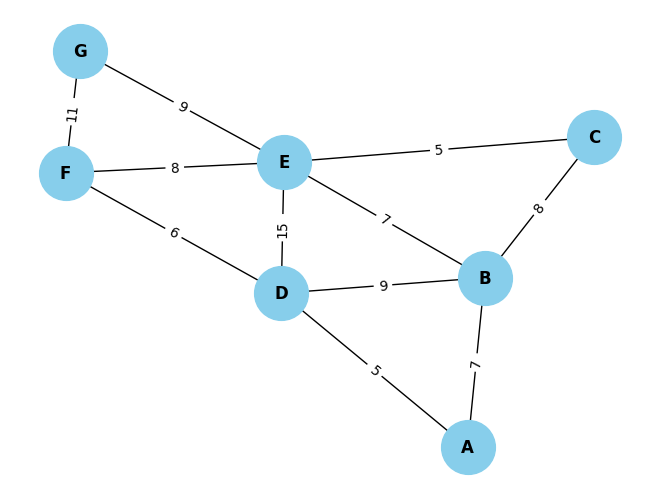

Minimum spanning tree total weight: 39
Execution time: 4.76837158203125e-05 seconds

Test Case 2


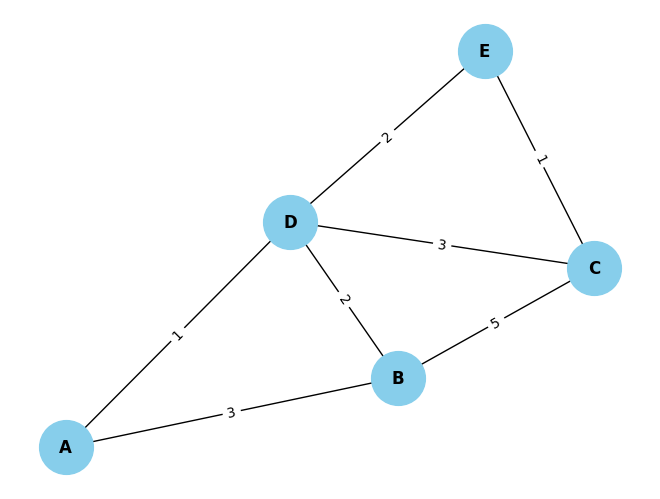

Minimum spanning tree total weight: 6
Execution time: 2.5272369384765625e-05 seconds


In [ ]:
# Test and visualize the results of Problem 2 - Kruskal's Algorithm
print("\nProblem 2 - Kruskal's Algorithm")
print("Test Case 1")
visualize_graph(test_case1)
result, execution_time = measure_execution_time_kruskal(kruskal, test_case1)
print(f"Minimum spanning tree total weight: {result}")
print(f"Execution time: {execution_time} seconds")

print("\nTest Case 2")
visualize_graph(test_case2)
result, execution_time = measure_execution_time_kruskal(kruskal, test_case2)
print(f"Minimum spanning tree total weight: {result}")
print(f"Execution time: {execution_time} seconds")

# **Problem 3: Dijkstra's Algorithm (20 points)**
**Task:**  In this problem, you will implement Dijkstra's algorithm, which is a shortest-path algorithm used to find the shortest path from a source node to all other nodes in a graph with non-negative edge weights. Dijkstra's algorithm is widely used in routing and navigation systems, as well as in various network routing protocols. (You can utilize the heapq library for heap implementation in these algorithms)

*Hint: Initialize a dictionary to store the shortest distances from the source node to all other nodes, and a min-heap to store the nodes to be explored. Use the heapq library to maintain the min-heap. At each step, select the node with the smallest distance from the min-heap, and update the distances to its neighbors if a shorter path is found.*


In [6]:
import heapq
import math

def dijkstra(graph, start):
    """
    Input:
        graph: A dictionary representing the adjacency list of the connected, directed, and weighted graph.
               The keys are node labels and the values are lists of tuples containing a neighbor and the edge weight.
        start: The starting node label (a key in the graph dictionary).
        end: The ending node label (a key in the graph dictionary).

    Output:
        Returns the shortest distance between the start and end nodes in the input graph.
    """

    # Step 1: Add the starting vertex s to the initially empty fringe with priority value 0
    # Step 2: Add all other vertices to the fringe with priority value of infinity

    distance_mapping = {}
    for vertex in graph:
        distance_mapping[vertex] = math.inf
    distance_mapping[start] = 0

    priority_queue = [(0, start)]

    # Step 3: While the fringe is not empty: O(|V|)
    while len(priority_queue) > 0:
        # Step 3-1: Remove the vertex in the fringe with the minimum priority. O(log |V|)
        current_distance, current_vertex = heapq.heappop(priority_queue)

        # Step 3-2: For each of u's neighbors v: O(E_v)
        for neighbor, weight in graph[current_vertex]:
            temp_distance = current_distance + weight

            # Update only when path is better
            if temp_distance < distance_mapping[neighbor]:
                distance_mapping[neighbor] = temp_distance
                heapq.heappush(priority_queue, (temp_distance, neighbor))

    return distance_mapping



Problem 3 - Dijkstra's Algorithm
Test Case 1


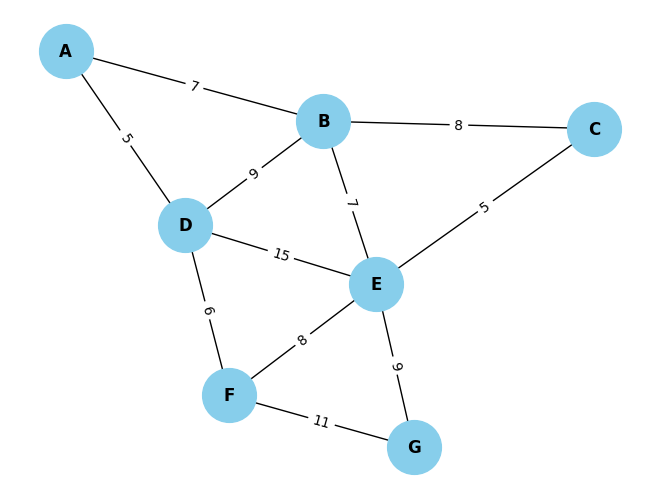

Shortest distances from node A: {'A': 0, 'B': 7, 'C': 15, 'D': 5, 'E': 14, 'F': 11, 'G': 22}
Execution time: 2.002716064453125e-05 seconds

Test Case 2


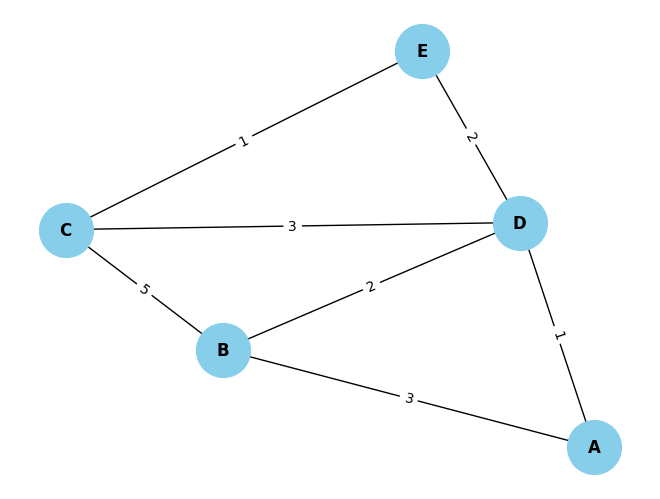

Shortest distances from node A: {'A': 0, 'B': 3, 'C': 4, 'D': 1, 'E': 3}
Execution time: 1.5735626220703125e-05 seconds


In [7]:
# Test and visualize the results of Problem 3 - Dijkstra's Algorithm
print("\nProblem 3 - Dijkstra's Algorithm")
print("Test Case 1")
visualize_graph(test_case1)
result, execution_time = measure_execution_time(dijkstra, test_case1, 'A')
print(f"Shortest distances from node A: {result}")
print(f"Execution time: {execution_time} seconds")

print("\nTest Case 2")
visualize_graph(test_case2)
result, execution_time = measure_execution_time(dijkstra, test_case2, 'A')
print(f"Shortest distances from node A: {result}")
print(f"Execution time: {execution_time} seconds")

# **Problem 4: Advanced Application (40 points)**
**Task:**  In this problem, you will apply one of the algorithms learned in the previous problems (Dijkstra's algorithm) to a real-world scenario. You will use Dijkstra's algorithm to find the shortest path between two locations in a city. The city's road network is represented as an undirected graph, where nodes represent locations and edges represent roads with distances. (You can utilize the heapq library for heap implementation in these algorithms)

*Hint: Modify the Dijkstra's algorithm implementation to return the shortest path between two nodes in addition to the shortest distances. To do this, you will need to maintain a dictionary to store the previous node in the shortest path for each node. After finding the shortest distances, you can reconstruct the path by backtracking from the destination node to the source node using the previous nodes.*


In [8]:
import heapq

def dijkstra_with_path(graph, start, end):
    """
    Input:
        graph: A dictionary representing the adjacency list of the connected, directed, and weighted graph.
               The keys are node labels and the values are lists of tuples containing a neighbor and the edge weight.
        start: The starting node label (a key in the graph dictionary).
        end: The ending node label (a key in the graph dictionary).

    Output:
        Returns the shortest distance between the start and end nodes in the input graph.
    """

    # Step 1: Add the starting vertex s to the initially empty fringe with priority value 0
    # Step 2: Add all other vertices to the fringe with priority value of infinity

    previous_node_mapping = {}

    distance_mapping = {}
    for vertex in graph:
        distance_mapping[vertex] = math.inf
    distance_mapping[start] = 0

    priority_queue = [(0, start)]

    # Step 3: While the fringe is not empty: O(|V|)
    while len(priority_queue) > 0:
        # Step 3-1: Remove the vertex in the fringe with the minimum priority. O(log |V|)
        current_distance, current_vertex = heapq.heappop(priority_queue)

        # Step 3-2: For each of u's neighbors v: O(E_v)
        for neighbor, weight in graph[current_vertex]:
            temp_distance = current_distance + weight

            # Update only when path is better
            if temp_distance < distance_mapping[neighbor]:
                distance_mapping[neighbor] = temp_distance
                heapq.heappush(priority_queue, (temp_distance, neighbor))
                previous_node_mapping[neighbor] = current_vertex

    #  Find from end to start
    shortest_path = [end]

    while start not in shortest_path:
        end = previous_node_mapping[end]
        if start not in shortest_path:
            shortest_path.append(end)

    shortest_path_distance = 0

    # Reverse List so it shows start to end
    shortest_path = shortest_path[::-1]

    # From Graph find weights and total them up
    previous = start
    for current_vertex in shortest_path:
        if current_vertex == start:
            pass
        else:
            for neighbor, weight in graph[current_vertex]:
                if neighbor == previous:
                    shortest_path_distance += weight
                    previous = current_vertex

    return shortest_path_distance, shortest_path


**Test case**

In [9]:
test_case4 = {
    "A": [("B", 2), ("C", 3), ("D", 1)],
    "B": [("A", 2), ("D", 3), ("E", 5)],
    "C": [("A", 3), ("D", 4), ("F", 2)],
    "D": [("A", 1), ("B", 3), ("C", 4), ("E", 1), ("F", 6), ("G", 8)],
    "E": [("B", 5), ("D", 1), ("G", 6)],
    "F": [("C", 2), ("D", 6), ("G", 3)],
    "G": [("D", 8), ("E", 6), ("F", 3)],
}


Shortest distance: 8
Shortest path: ['A', 'D', 'E', 'G']


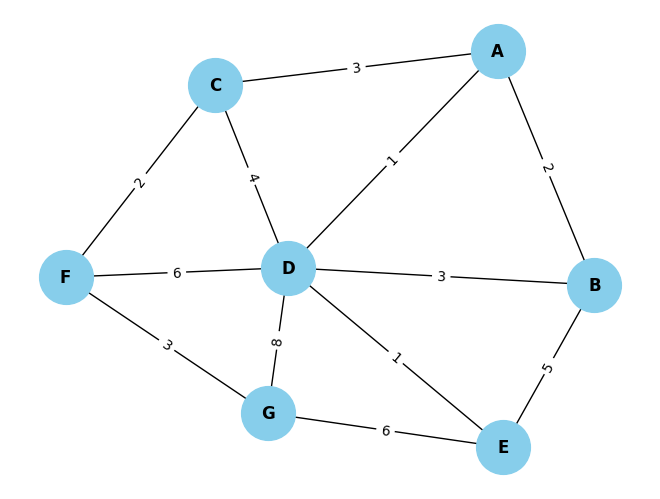

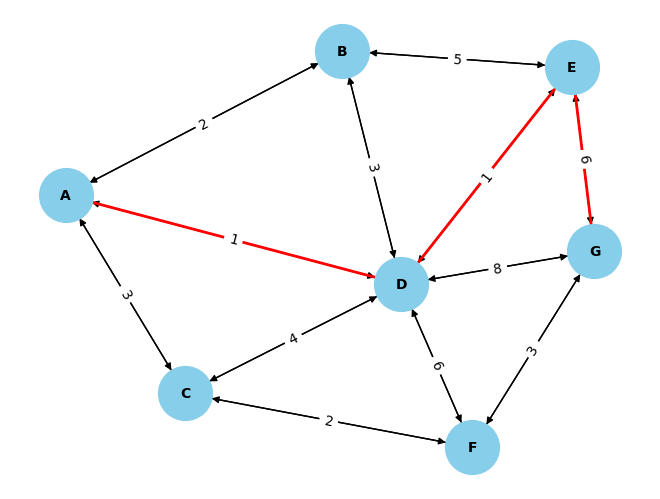

In [10]:
# Test dijkstra_with_path 
start_node = "A"
end_node = "G"

distance, path = dijkstra_with_path(test_case4, start_node, end_node)

print(f"Shortest distance: {distance}")
print(f"Shortest path: {path}")

# Visualize the graph
visualize_graph(test_case4)

# Visualize the shortest path
def visualize_path(graph, path):
    G = nx.DiGraph()

    for node in graph:
        G.add_node(node)
        for neighbor, weight in graph[node]:
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=1500, node_color='skyblue', font_size=10)

    # Highlight the shortest path
    edges = [(path[i], path[i+1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color="r", width=2)

    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10)
    plt.show()

visualize_path(test_case4, path)
